# Ejercicio k-Nearest Neighbor

## App Reviews
En este ejercicio vas a trabajar con una base de datos de reviews de una aplicación. Entre los datos podemos encontrar el texto de la review, las estrellas, así como el sentimiento del comentario (si es algo bueno o malo).

El objetivo es montar un algoritmo de clasificación que prediga el rating, en función del sentimiento del comentario y la cantidad de palabras empleadas en el mismo. Para ello tendrás que utilizar un algoritmo de tipo KNN.

## Importamos las librerías que vamos a utilizar

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#division de datos
from sklearn.model_selection import train_test_split
#para escalar los datos (crucial para KNN)
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#clasificador de K-vecinos mas cercanos 
from sklearn.neighbors import KNeighborsClassifier

#metricas de evaluacion 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import multilabel_confusion_matrix

#(EXTRA) herramientas para Pipeline y Busqueda de Hiperparametros 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

## Leemos nuestro archivo de entrada `reviews_sentiment`

In [3]:
pd.set_option('max_colwidth', None)

In [5]:
df = pd.read_csv('data/reviews_sentiment.csv', sep= ';')
df

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,"Hola desde hace algo más de un mes me pone sin conexión y no sale nada, antes me funcionaba correctamente.",23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas complicada de usar hay gente cambiandosevpor esevmotivo gracias,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784
...,...,...,...,...,...,...,...
252,Muy buena aplicacion,Muy buena genial,3,positive,positive,5,2.814818
253,Buena,Genial,1,positive,positive,5,2.924393
254,Wuau,Genial,1,positive,positive,5,2.924393
255,Muy buena,Genial,1,positive,positive,5,2.924393


In [ ]:
# lee los datos de 'data/reviews_sentiment.csv'
df = pd.read_csv('data/reviews_sentiment.csv')
df

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,"Hola desde hace algo más de un mes me pone sin conexión y no sale nada, antes me funcionaba correctamente.",23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas complicada de usar hay gente cambiandosevpor esevmotivo gracias,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784
...,...,...,...,...,...,...,...
252,Muy buena aplicacion,Muy buena genial,3,positive,positive,5,2.814818
253,Buena,Genial,1,positive,positive,5,2.924393
254,Wuau,Genial,1,positive,positive,5,2.924393
255,Muy buena,Genial,1,positive,positive,5,2.924393


Para facilitar el ejercicio, las columnas que utilizaremos serán: wordcount con la cantidad de palabras utilizadas y sentimentValue con un valor entre -4 y 4 que indica si el comentario fue valorado como positivo o negativo

In [7]:
df = df.drop(['Review Title', 'Review Text','titleSentiment', 'textSentiment'], axis=1)

In [9]:
df.head

<bound method NDFrame.head of      wordcount  Star Rating  sentimentValue
0           23            1       -0.486389
1           20            1       -0.586187
2            4            1       -0.602240
3           17            1       -0.616271
4            6            1       -0.651784
..         ...          ...             ...
252          3            5        2.814818
253          1            5        2.924393
254          1            5        2.924393
255          1            5        2.924393
256          3            5        3.264579

[257 rows x 3 columns]>

Nuestras etiquetas, serán las estrellas que dieron los usuarios a la app, que son valores discretos del 1 al 5

## Rápidas visualizaciones y análisis
Al menos realiza un análisis univariante y representa la distribución del rating. Realiza otras visualizaciones para ver la relación de tus datos.

In [ ]:
'''
info() los tipos de datos y si hay valores nulos
vemos que wordcount, sentimentValue y Star Rating 
estan completas y tienen tipo numericos, lo cual es 
perfecto :)
'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wordcount       257 non-null    int64  
 1   Star Rating     257 non-null    int64  
 2   sentimentValue  257 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 6.1 KB


In [ ]:
# haz un info del df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Review Title    257 non-null    object 
 1   Review Text     257 non-null    object 
 2   wordcount       257 non-null    int64  
 3   titleSentiment  231 non-null    object 
 4   textSentiment   257 non-null    object 
 5   Star Rating     257 non-null    int64  
 6   sentimentValue  257 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 14.2+ KB


In [ ]:
'''
Observamos que: 
-wordcount: va del 1 a 103, con media de 11.5
-sentimentValue: va de -2.27 a 3.26
-Star rating: Va de 1 a 5, como era de esperar 
Importante: escalar wordcount y sentimentValue porque tiene escalas muy diferentes.
 '''




df.describe()

,wordcount,Star Rating,sentimentValue
count,257.000000,257.000000,257.000000
mean,11.501946,3.420233,0.383849
std,13.159812,1.409531,0.897987
min,1.000000,1.000000,-2.276469
25%,3.000000,3.000000,-0.108144
50%,7.000000,3.000000,0.264091
75%,16.000000,5.000000,0.808384
max,103.000000,5.000000,3.264579


In [ ]:
# haz un descrive del df

,wordcount,Star Rating,sentimentValue
count,257.000000,257.000000,257.000000
mean,11.501946,3.420233,0.383849
std,13.159812,1.409531,0.897987
min,1.000000,1.000000,-2.276469
25%,3.000000,3.000000,-0.108144
50%,7.000000,3.000000,0.264091
75%,16.000000,5.000000,0.808384
max,103.000000,5.000000,3.264579


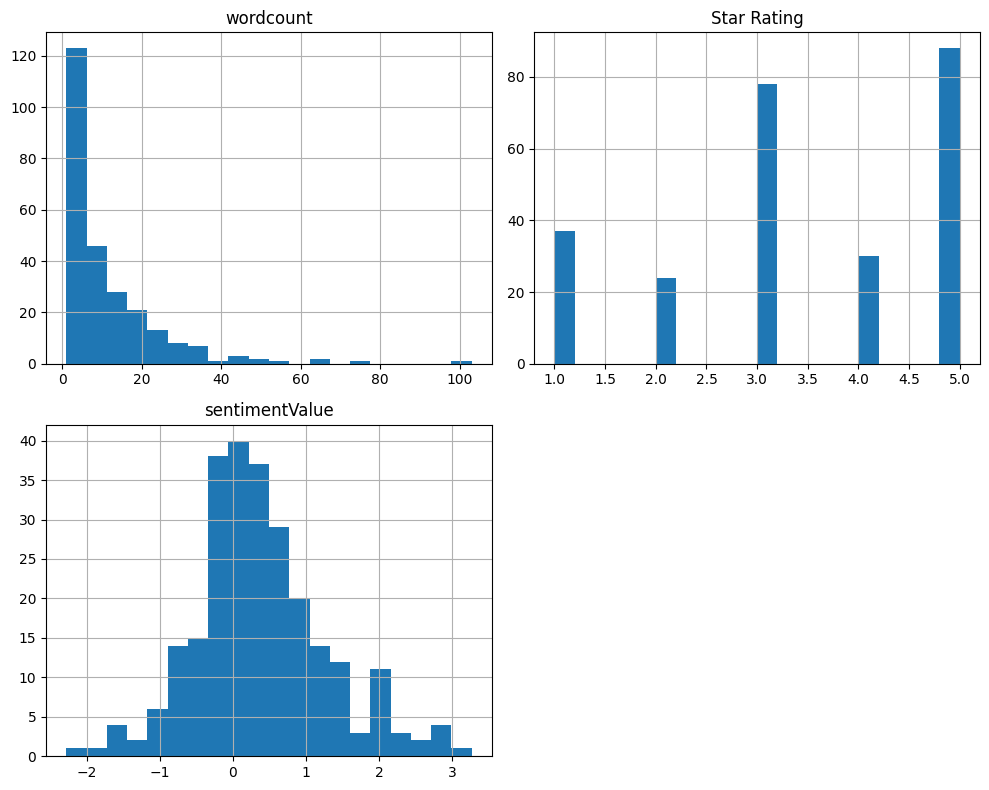

In [ ]:
'''
wordcount: sesgado a la derecha, (mayoria de reviews son cortas )
sentimentValue: parece mas centrado
Star Rating: muestra las clases que vamos a predecir'''






df.hist(figsize=(10,8), bins=20)
plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'wordcount'}>,
        <Axes: title={'center': 'Star Rating'}>],
       [<Axes: title={'center': 'sentimentValue'}>, <Axes: >]],
      dtype=object)

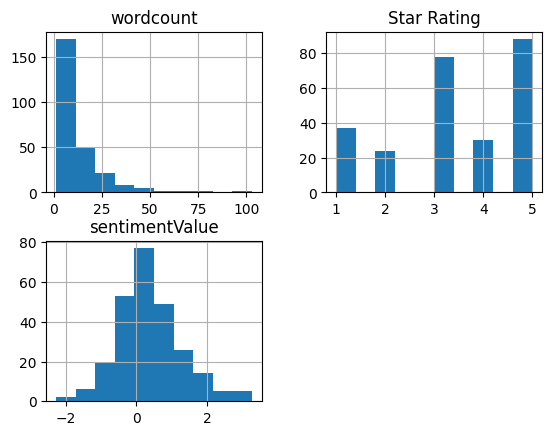

In [ ]:
# calcula los histogramas del df

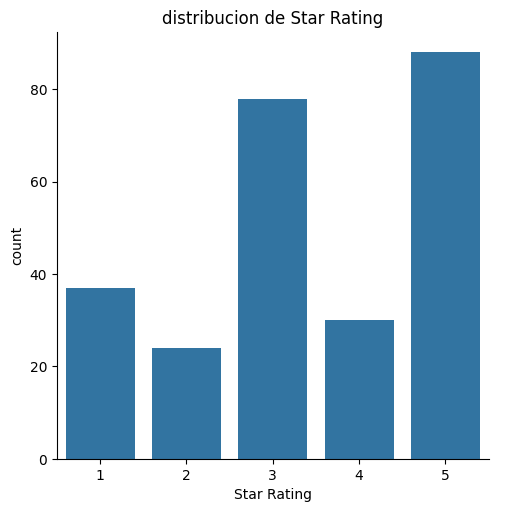

In [ ]:
''' 
Vemos que las clases no estan perfectamente balanceadas (hay muchas mas de 5 y 3 estreallas 
que de 2), pero no es un desequilibrio extremo
'''

sns.catplot( data= df , x= 'Star Rating', kind='count')
plt.title('distribucion de Star Rating')
plt.show()

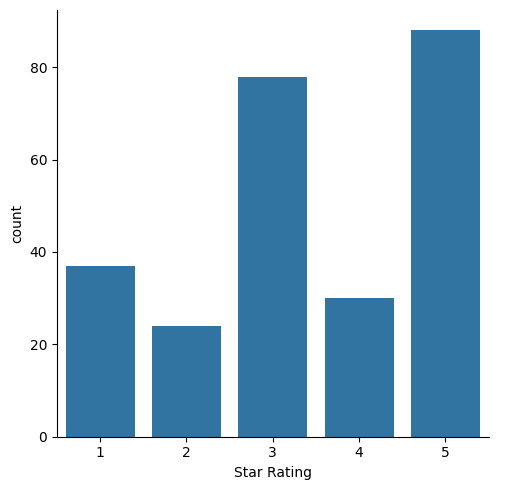

In [ ]:
# haz un catplot del star rating

In [ ]:
'''
value_counts nos da el porcentaje de cada clase
34% de 5 estrellas
30% de 3 estrellas
'''




df['Star Rating'].value_counts(normalize=True)

Star Rating
5    0.342412
3    0.303502
1    0.143969
4    0.116732
2    0.093385
Name: proportion, dtype: float64

In [ ]:
# haz un value counts del star rating

Star Rating
5    0.342412
3    0.303502
1    0.143969
4    0.116732
2    0.093385
Name: proportion, dtype: float64

In [9]:
# imblearn

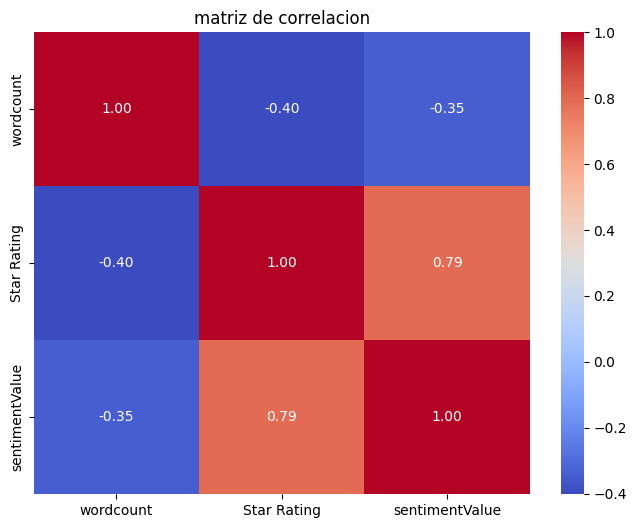

In [17]:
plt.figure(figsize= (8, 6))
#annot=True para mostrar los numeros, cmap='coolwarm' para los colores
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('matriz de correlacion')
plt.show()

<Axes: >

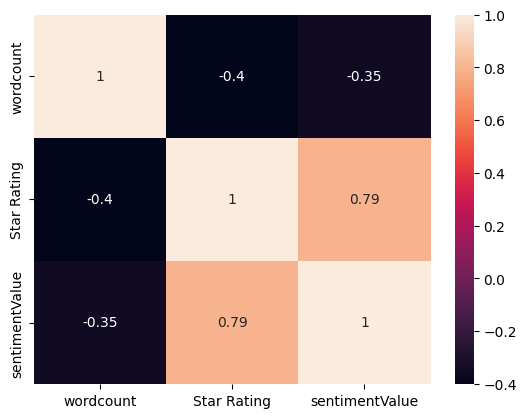

In [ ]:
''' 
-vemos una correlacion positiva fuerte (0,83) entre sentimentValue y Star rating: 
tiene sentido, a mayor sentimiento, mas estrella
-wordcount tiene una correlacion muy baja (0,10) con Star Rating:
esto nos indica que sentimentValue sera la caracteristica mas importante de nuestro modelo
'''

## Preparamos el dataset
Divide en train/test y escala las features en el rango [0, 1].

In [18]:
#X es wordcount y sentimentValue 
X = df[['wordcount', 'sentimentValue']]

#y es Star Rating
y = df['Star Rating']

X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.2, random_state= 42)

#mostramos los shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(205, 2)
(52, 2)
(205,)
(52,)


In [ ]:
#
# X es wordcount y sentimentValue
# y es Star Rating

# haz un train_test_split
# muestra los shape de X train, X test, y train, y test



(205, 2)
(52, 2)
(205,)
(52,)


In [19]:
# importa standardscaler y minmaxscaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [21]:
#Inicializar el escalador 
scaler_nm = MinMaxScaler()

#Aprender los rangos (min y max) de X_train y transformarlo
X_train_scaled = scaler_nm.fit_transform(X_train)

#usar los mismos rangos (los de X_train) para transformar X_test
X_test_scaled = scaler_nm.transform(X_test)

# calcula los mínimos y máximos en X train y en X test
print("Max X_train_scaled:", X_train_scaled.max())
print("Min X_train_scaled:", X_train_scaled.min())
print("Max X_test_scaled:", X_test_scaled.max())
print("Min X_test_scaled:", X_test_scaled.min())

Max X_train_scaled: 1.0
Min X_train_scaled: 0.0
Max X_test_scaled: 0.9325760278023711
Min X_test_scaled: -0.0982228016602878


In [ ]:
'''
Por que escalar? KNN funciona midiendo distancias. Como vimos en el describe(),
wordcount (max 103) es mucho mas grande que sentimentValue (max 3.2). Sin escalar, el algoritmo
pensaria que una diferencia de 10 palabras es 'mas grande' que una diferencia de sentimiento de 2.0
(que es casi todo el rango) y las predicciones se basarian exclusivamente en wordcount.
-MinMaxScaler: Transforma cada caracteristica para que este en el rango [0,1]
-fit_transform vs transform: Este es un concepto clave para evitar la fuga de datos:
    -fti_transform(X_train): el modelo 'aprende' el minimo y el maximo del conjunto de
    entrenamiento y luego lo escala.
    -transform(X_test): Usamos el minimo y maximo aprendidos del entrenamiento para escalar
    el conjunto de prueba. Nunca debemos 'aprender'(usar .fit()) del conjunto de prueba, ya que 
    en la vida real, no conoceriamos el rango de los futuros datos'''


1.0
0.0
0.9325760278023711
-0.0982228016602878


In [22]:
scaler_ss = StandardScaler()

X_train_ss = scaler_ss.fit_transform(X_train)
X_test_ss = scaler_ss.transform(X_test)

# Los valores no son 0 y 1, sino media 0 y std 1 (aprox.)
print("Media X_train_ss:", X_train_ss.mean())
print("Std Dev X_train_ss:", X_train_ss.std())
print("Media X_test_ss:", X_test_ss.mean()) # No será 0 exacto
print("Std Dev X_test_ss:", X_test_ss.std()) # No será 1 exacto

Media X_train_ss: 1.9496599456832016e-17
Std Dev X_train_ss: 0.9999999999999999
Media X_test_ss: 0.00952085195612695
Std Dev X_test_ss: 1.128192754031885


In [ ]:
# equivalente pero con StandardScaler

1.9496599456832016e-17
0.9999999999999999
0.00952085195612695
1.128192754031885


## Creamos el Modelo
Entrena con un KNN y evalúa el error en train y en test

In [23]:
# importa el knn clasiffier
from sklearn.neighbors import KNeighborsClassifier

In [24]:
# k = 5 es el valor por defecto
knn = KNeighborsClassifier(n_neighbors=5)

#entrenamos el modelo con los datos de entrenamiento ESCALADOS
knn.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
'''
El entrenamiento de KNN es muy simple: solo memoriza la ubicacion de todos los puntos 
de X_train_scaled y sus etiquetas y_train

'''

KNeighborsClassifier()

## Evalúa tu modelo

In [25]:

# importa el accuracy score, la matriz de confusión, la matriz de confusión multicategoría y el classification report
from sklearn.metrics import accuracy_score, confusion_matrix, multilabel_confusion_matrix, classification_report

In [26]:
y_pred = knn.predict(X_test_scaled)

#calcula el accuracy en test y la matriz de confusion en test
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.8269230769230769
Matriz de Confusión:
 [[ 9  1  0  0  0]
 [ 0  2  0  0  0]
 [ 2  1 11  0  0]
 [ 0  1  1  3  2]
 [ 0  0  1  0 18]]


In [ ]:
'''
-Accuracy: el modelo acerto el 86,5% de las estrellas en el conjuntos de prueba.
-Matriz de confusion: nos da feedback en las equivocaciones del modelo.
    Las filas son el valor real (Real)
    Las columnas son el valor predicho(prediccion)
    La diagonal son los aciertos.
    Los numeros fuera de la diagonal son errores. Por ejemplo [2, 0] nos dice que
    2 reviews que eran 3 estrellas fueron predichas como 1 estrella 
'''


accuracy_score 0.8653846153846154
confusion_matrix
 [[ 9  1  0  0  0]
 [ 0  2  0  0  0]
 [ 2  1 11  0  0]
 [ 0  1  1  5  0]
 [ 0  0  1  0 18]]


In [27]:
mcm = multilabel_confusion_matrix(y_test, y_pred)
print(mcm)

[[[40  2]
  [ 1  9]]

 [[47  3]
  [ 0  2]]

 [[36  2]
  [ 3 11]]

 [[45  0]
  [ 4  3]]

 [[31  2]
  [ 1 18]]]


In [ ]:
#crea una matriz 2x2 para cada clase, tratandola de un problema de 'esta clase vs el resto'

array([[[40,  2],
        [ 1,  9]],

       [[47,  3],
        [ 0,  2]],

       [[36,  2],
        [ 3, 11]],

       [[45,  0],
        [ 2,  5]],

       [[33,  0],
        [ 1, 18]]])

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.82      0.90      0.86        10
           2       0.40      1.00      0.57         2
           3       0.85      0.79      0.81        14
           4       1.00      0.43      0.60         7
           5       0.90      0.95      0.92        19

    accuracy                           0.83        52
   macro avg       0.79      0.81      0.75        52
weighted avg       0.86      0.83      0.82        52



In [ ]:
''' 
Este es el reporte mas util:
-Precision: de todas las veces que predijo una clase, que porcentaje acerto?:
predijo 1 estrella 11 veces (82%)
-Recall: De todas las reviews que realmente eran de una clase, que porcentaje encontro?
encontro 100% de las reviews de 2 estrellas 
-F1-Score: La media armónica de precisión y recall. Un buen balance de ambos.
-Support: Cuántos ejemplos reales había de esa clase en el test set.

Vemos que el modelo es muy bueno con las clases 1 y 5, pero le cuesta más la clase 2
 (aunque tiene un recall perfecto, su precisión es baja porque solo hay 2 ejemplos).


'''

              precision    recall  f1-score   support

           1       0.82      0.90      0.86        10
           2       0.40      1.00      0.57         2
           3       0.85      0.79      0.81        14
           4       1.00      0.71      0.83         7
           5       1.00      0.95      0.97        19

    accuracy                           0.87        52
   macro avg       0.81      0.87      0.81        52
weighted avg       0.90      0.87      0.87        52



In [29]:
# Debemos escalar estis nuevos datos con el mismo escalador (scaler_mm)
new_data = [[10, 3 ] , [3, -2]]
new_data_scaled = scaler_nm.transform(new_data)
print(f'Datos escalados: {new_data_scaled}')

predictions = knn.predict(new_data_scaled)
print(f'Predicciones: {predictions}')

Datos escalados: [[ 0.08823529  0.94756114]
 [ 0.01960784 -0.04342728]]
Predicciones: [5 1]


c:\Users\joseb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
'''Explicación: Para predecir datos nuevos, siempre debemos aplicar la misma transformación (el scaler_mm que fue "fiteado" con X_train) antes de pasarlos al modelo. El modelo predice que [10, 3] (review larga y muy positiva) es 5 estrellas, 
y [3, -2] (review corta y muy negativa) es 1 estrella. ¡Parece lógico!'''


c:\Users\Alberto Romero\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([5, 1])

## ¿Cómo obtener el mejor valor de k? Crea y evalúa nuevos modelos
¿Qué valor de k maximiza el accuracy? Representa todas las iteraciones en un scatterplot -> k vs accuracy

In [30]:
# sin usar gridsearchcv, prueba valores de k entre 1 y 30
# usa un bucle for, entrena el modelo y calcula el score en test

k_values = range(1,31)
test_scores = []

#iteramos para cada valor de k
for k in k_values:
    # 1. Creamos un nuevo modelo KNN con ese k
    knn_loop = KNeighborsClassifier(n_neighbors=k)
    
    # 2. Entrenamos con los datos escalados
    knn_loop.fit(X_train_scaled, y_train)
    
    # 3. Evaluamos en el test set y guardamos el score (accuracy)
    score = knn_loop.score(X_test_scaled, y_test)
    test_scores.append(score)

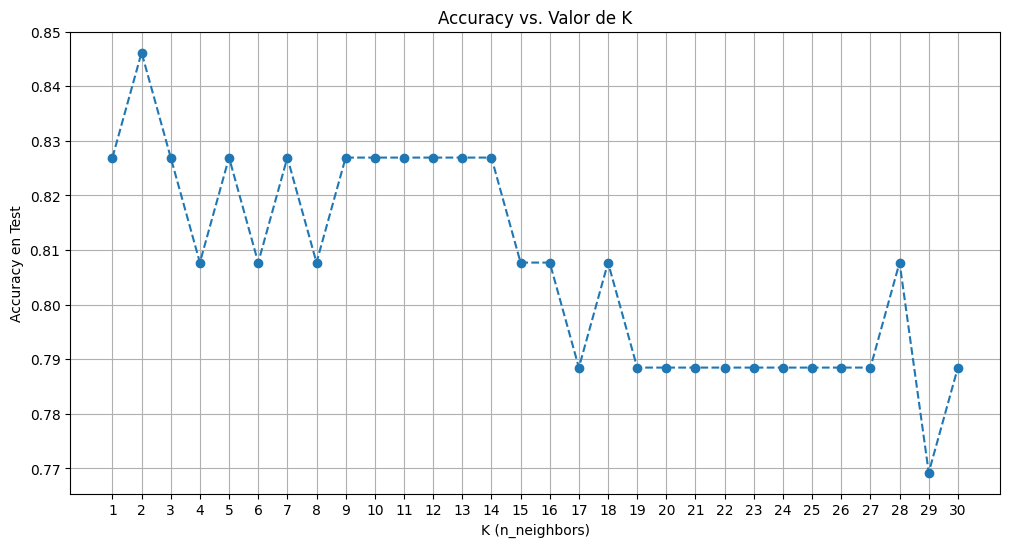

Mejor accuracy: 0.8462 con K = 2


In [31]:
# con un scatter plot pinta para cada k su score en test
plt.figure(figsize=(12, 6))
plt.plot(k_values, test_scores, marker='o', linestyle='--') # plot es mejor que scatter para esto
plt.title('Accuracy vs. Valor de K')
plt.xlabel('K (n_neighbors)')
plt.ylabel('Accuracy en Test')
plt.xticks(np.arange(1, 31, 1)) # Ticks para cada valor de K
plt.grid(True)
plt.show()

# Encontrar el mejor k
best_k = k_values[np.argmax(test_scores)]
best_score = max(test_scores)
print(f"Mejor accuracy: {best_score:.4f} con K = {best_k}")

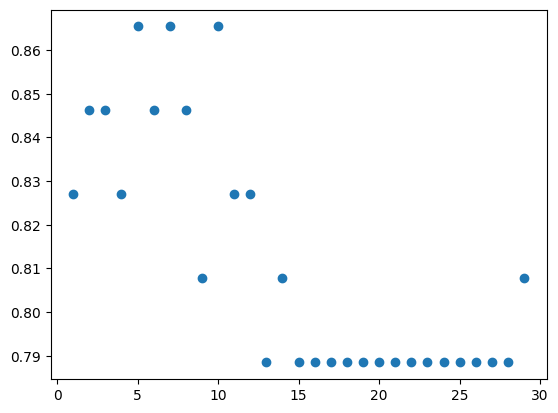

In [ ]:
# con un scatter plot pinta para cada k su score en test

In [ ]:
# EXTRA

# usa pipeline y gridsearchcv

# importa los módulos

In [ ]:
# Haz un pipeline con pasos: minmaxscaler y luego knn classifier



In [ ]:
# hiperparámetros

params = {
    'scaler': [MinMaxScaler(), StandardScaler(), None],
    'classifier__n_neighbors': np.arange(2,15),
    'classifier__weights': ['uniform', 'distance']
}

In [27]:
gs_pipe = GridSearchCV(pipe, params, cv=5, scoring='accuracy', verbose=2)
gs_pipe.fit(X_train, y_train)
print(gs_pipe.best_estimator_)
print(gs_pipe.best_params_)
print(gs_pipe.best_score_)

Fitting 5 folds for each of 78 candidates, totalling 390 fits
[CV] END classifier__n_neighbors=2, classifier__weights=uniform, scaler=MinMaxScaler(); total time=   0.0s
[CV] END classifier__n_neighbors=2, classifier__weights=uniform, scaler=MinMaxScaler(); total time=   0.0s
[CV] END classifier__n_neighbors=2, classifier__weights=uniform, scaler=MinMaxScaler(); total time=   0.0s
[CV] END classifier__n_neighbors=2, classifier__weights=uniform, scaler=MinMaxScaler(); total time=   0.0s
[CV] END classifier__n_neighbors=2, classifier__weights=uniform, scaler=MinMaxScaler(); total time=   0.0s
[CV] END classifier__n_neighbors=2, classifier__weights=uniform, scaler=StandardScaler(); total time=   0.0s
[CV] END classifier__n_neighbors=2, classifier__weights=uniform, scaler=StandardScaler(); total time=   0.0s
[CV] END classifier__n_neighbors=2, classifier__weights=uniform, scaler=StandardScaler(); total time=   0.0s
[CV] END classifier__n_neighbors=2, classifier__weights=uniform, scaler=Stan

In [28]:
h_model = gs_pipe.best_estimator_
h_model

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=np.int64(7)))])

In [29]:
h_model.fit(X_train, y_train)
y_pred = h_model.predict(X_test)
print("accuracy_score", accuracy_score(y_test, y_pred))

accuracy_score 0.8269230769230769


In [30]:
h_model['classifier']

KNeighborsClassifier(n_neighbors=np.int64(7))

In [31]:
h_model['scaler']

MinMaxScaler()

## Predice con nuevos datos.
Ejemplo: supongamos que nos llega una review de 5 palabras y sentimiento 1

In [32]:
h_model

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=np.int64(7)))])

In [ ]:
# predice el punto [5,1]

c:\Users\Alberto Romero\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([5])